In [ ]:
!pip install pretrainedmodels
import pretrainedmodels 
import os
from torch.utils.data import Dataset
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import time
import numpy as np
import pandas as pd
import os
import datetime as dt
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
import torch
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms, datasets, models
%matplotlib inline
from fastai import *
from fastai.vision import *
import seaborn as sns
from sklearn.metrics import auc,roc_curve

from math import floor



from __future__ import print_function, division
#import torch.nn as nn
#import torch.optim as optim
#from torch.optim import lr_scheduler
#import numpy as np
#import torchvision
#from torchvision import datasets, models, transforms
#import matplotlib.pyplot as plt
#import time
#import os
import copy

plt.ion() # interactive mode

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# !mkdir /root/.kaggle
# !ls -la /root/.kaggle
# !cp gdrive/My\ Drive/kaggleCompete/kaggle.json /root/.kaggle/

# # To get the API token from kaggle (kaggle.json file)
# !pip uninstall -y kaggle
# !pip install --upgrade pip
# !pip install kaggle==1.5.6
# !kaggle -v

# #download data, will take 30-60 seconds
# !kaggle competitions download -c ammi-2020-convnets

# !unzip -qq ammi-2020-convnets

In [ ]:
#Correction of the bug for ImageDataBunch
!curl -s https://course.fast.ai/setup/colab | bash
!pip uninstall torch torchvision -y
!pip install torch==1.4.0 torchvision==0.5.0

Updating fastai...
Done.
Uninstalling torch-1.5.0+cu101:
  Successfully uninstalled torch-1.5.0+cu101
Uninstalling torchvision-0.6.0+cu101:
  Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 36.5MB/s 


In [ ]:
train_path = '/content/gdrive/My Drive/ammi-2020-convnets/train/train/'
test_path = '/content/gdrive/My Drive/ammi-2020-convnets/test/test/0/'

In [ ]:
def get_labels(file_path): 
    dir_name = os.path.dirname(file_path)
    split_dir_name = dir_name.split("/")
    dir_levels = len(split_dir_name)
    label  = split_dir_name[dir_levels - 1]
    return(label)

In [ ]:
get_labels(train_path+"cgm/train-cgm-528.jpg")

'cgm'

In [ ]:
from glob import glob
imagePatches = glob(train_path+"*/*.*", recursive=True)
imagePatches[0:10]

['/content/gdrive/My Drive/ammi-2020-convnets/train/train/cmd/train-cmd-2490.jpg',
 '/content/gdrive/My Drive/ammi-2020-convnets/train/train/cmd/train-cmd-2434.jpg',
 '/content/gdrive/My Drive/ammi-2020-convnets/train/train/cmd/train-cmd-2442.jpg',
 '/content/gdrive/My Drive/ammi-2020-convnets/train/train/cmd/train-cmd-2428.jpg',
 '/content/gdrive/My Drive/ammi-2020-convnets/train/train/cmd/train-cmd-2451.jpg',
 '/content/gdrive/My Drive/ammi-2020-convnets/train/train/cmd/train-cmd-2431.jpg',
 '/content/gdrive/My Drive/ammi-2020-convnets/train/train/cmd/train-cmd-2423.jpg',
 '/content/gdrive/My Drive/ammi-2020-convnets/train/train/cmd/train-cmd-2405.jpg',
 '/content/gdrive/My Drive/ammi-2020-convnets/train/train/cmd/train-cmd-2492.jpg',
 '/content/gdrive/My Drive/ammi-2020-convnets/train/train/cmd/train-cmd-2430.jpg']

In [ ]:
path=""
tfms = get_transforms(do_flip=True,flip_vert=True,max_rotate=360,max_warp=0,max_zoom=1.1,max_lighting=0.25,p_lighting=0.5)

In [ ]:
pwd

'/content'

In [ ]:
data = ImageDataBunch.from_name_func(path, imagePatches, label_func=get_labels,  size=500, 
                                     bs=20,num_workers=2,test = test_path,ds_tfms=tfms
                                  ).normalize(imagenet_stats)

    

In [ ]:
type(data)

fastai.vision.data.ImageDataBunch

In [ ]:
#data.show_batch(rows=3, figsize=(8,8))

In [ ]:
def se_resnext50_32x4d(pretrained=False):
    pretrained = 'imagenet' if pretrained else None
    model = pretrainedmodels.se_resnext50_32x4d(pretrained=pretrained)
    return model

In [ ]:
learner = cnn_learner(data, se_resnext50_32x4d, pretrained=True,
                   cut=-2, split_on=lambda m: (m[0][3], m[1]),metrics = [accuracy])

In [ ]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: ignored

In [ ]:
lr=1e-16
learner.fit_one_cycle(10, lr)

epoch,train_loss,valid_loss,accuracy,time
0,2.743764,2.075954,0.188329,04:24


KeyboardInterrupt: ignored

In [ ]:
learner.save('model-1')

In [ ]:
#learner.unfreeze()

In [ ]:
# learner.lr_find()
# learner.recorder.plot()

In [ ]:
#learner.freeze_to(-2)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


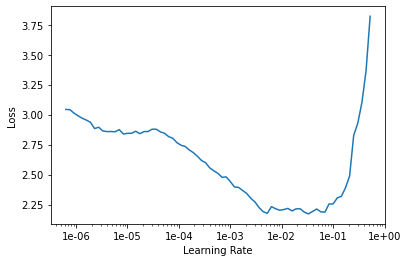

In [ ]:
# learner.lr_find()
# learner.recorder.plot()

In [ ]:
# learner.fit_one_cycle(10, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,2.925421,2.283395,0.176835,03:17
1,2.920777,2.289160,0.167993,03:21
2,2.953635,2.306890,0.175066,03:23
3,2.966506,2.293989,0.169761,03:22
4,2.849238,2.310347,0.171530,03:25
5,2.972526,2.284375,0.173298,03:22
6,2.934687,2.252911,0.180371,03:21
7,2.934236,2.327133,0.180371,03:19
8,2.951212,2.286880,0.175066,03:20
9,2.955507,2.259115,0.184792,03:24


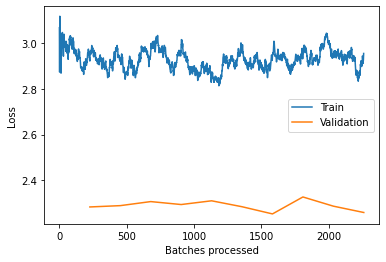

In [ ]:
learner.recorder.plot_losses()

In [ ]:
#learner.save('model-1')

In [ ]:
learner.validate()

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)

In [ ]:
#interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
#interp.most_confused(min_val=2)

In [ ]:
preds,y = learner.TTA(ds_type=DatasetType.Test)

In [ ]:
predictions = preds.numpy()

In [ ]:
class_preds = np.argmax(predictions, axis=1)


In [ ]:
# for c, i in learner.data.train_ds.y.c2i.items():
#     print(c,i)

In [ ]:
categories = ['cbb','cbsd','cgm','cmd','healthy']

def map_to_categories(predictions):
    return(categories[predictions])

categories_preds = list(map(map_to_categories,class_preds))

In [ ]:
filenames = list(map(os.path.basename,os.listdir(test_path)))

In [ ]:
df_sub = pd.DataFrame({'Category':categories_preds,'Id':filenames})

In [ ]:
df_sub.to_csv('submission_categories2.csv', header=True, index=False)

In [ ]:
#df_sub.to_csv('/content/My Drive/ammi-2020-convnets/submission_categories2.csv', header=True, index=False)

FileNotFoundError: ignored